In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore, boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
cardio=pd.read_csv("cardio.csv",sep=';')

In [3]:
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
cardio['age']=cardio['age']//365  #converting the age in days into age in years

In [5]:
cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0


In [6]:
print("shape:\t",cardio.shape)

shape:	 (69301, 13)


In [7]:
cardio.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [9]:
#droping id col
cardio.drop('id',axis=1,inplace=True)

In [10]:
cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

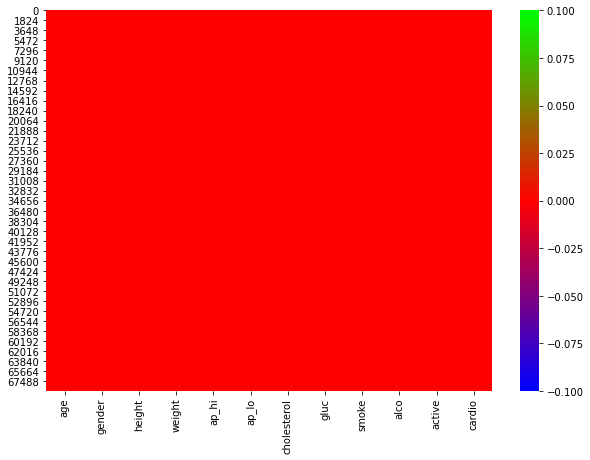

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(cardio.isnull(),cmap='brg')

In [12]:
#checking for duplicated values
dups=cardio.duplicated(keep='first').sum()
dups

3164

In [13]:
#dropoing duplicates
hrt=cardio.drop_duplicates(keep='first')
hrt.shape

(66137, 12)

In [14]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66137 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          66137 non-null  int64  
 1   gender       66137 non-null  int64  
 2   height       66137 non-null  int64  
 3   weight       66137 non-null  float64
 4   ap_hi        66137 non-null  int64  
 5   ap_lo        66137 non-null  int64  
 6   cholesterol  66137 non-null  int64  
 7   gluc         66137 non-null  int64  
 8   smoke        66137 non-null  int64  
 9   alco         66137 non-null  int64  
 10  active       66137 non-null  int64  
 11  cardio       66137 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.6 MB


In [15]:
hrt.groupby(['cardio','smoke','gender']).mean()

age      height     weight       ap_hi       ap_lo  \
cardio smoke gender                                                             
0      0     1       51.278521  161.404226  70.260357  120.130656   82.191156   
             2       51.351839  169.775517  74.821782  121.596552   90.844023   
       1     1       49.997642  162.193396  71.491274  118.702830   86.860849   
             2       50.543580  170.245570  74.801302  120.534901   83.546112   
1      0     1       54.653571  161.024648  75.313442  136.817782  107.815818   
             2       54.256791  169.921333  79.723517  139.234956  111.472942   
       1     1       53.398438  161.421875  79.704427  135.044271  114.625000   
             2       53.257757  170.721957  80.855768  137.635640  117.375099   

                     cholesterol      gluc      alco    active  
cardio smoke gender                                             
0      0     1          1.245771  1.192822  0.023876  0.803942  
             2          1.201609  1.180920  0.048161  0.806437  
       1     1          1.280660  1.212264  0.216981  0.825472  
             2          1.215190  1.165642  0.333816  0.866908  
1      0     1          1.553389  1.298209  0.023666  0.788083  
             2          1.452674  1.250731  0.050878  0.780819  
       1     1          1.750000  1.361979  0.177083  0.765625  
             2          1.546142  1.255768  0.297534  0.816229

In [16]:
#checking number of unique attributes and their value counts in Gender,Cholesterol,Glucose,Smoking,Alcohol intake,Physical activity,Presence or absence of disease 
categorical=['gender','cholesterol','gluc',"smoke",'alco','active','cardio']
for i in categorical:
    unique=hrt[i].nunique()
    vcnt=hrt[i].value_counts()
    print()
    print('The counts of unique values in --', i,' is:',unique,'\n',
          "The value count of those unique values","\n",'..'*30,'\n',vcnt,'\n')



The counts of unique values in -- gender  is: 2 
 The value count of those unique values 
 ............................................................ 
 1    42586
2    23551
Name: gender, dtype: int64 


The counts of unique values in -- cholesterol  is: 3 
 The value count of those unique values 
 ............................................................ 
 1    48769
2     9429
3     7939
Name: cholesterol, dtype: int64 


The counts of unique values in -- gluc  is: 3 
 The value count of those unique values 
 ............................................................ 
 1    55762
3     5238
2     5137
Name: gluc, dtype: int64 


The counts of unique values in -- smoke  is: 2 
 The value count of those unique values 
 ............................................................ 
 0    60050
1     6087
Name: smoke, dtype: int64 


The counts of unique values in -- alco  is: 2 
 The value count of those unique values 
 ............................................................

In [17]:
#performing cross_tabulation
cat=['gender','cholesterol','gluc',"smoke",'alco','active']

for i in cat:
    ctab=pd.crosstab(hrt[i],hrt['cardio'])
    print('_____________________________________________\nThe count of',i,'against disase range are:- \n',ctab)

_____________________________________________
The count of gender against disase range are:- 
 cardio      0      1
gender              
1       20821  21765
2       11465  12086
_____________________________________________
The count of cholesterol against disase range are:- 
 cardio           0      1
cholesterol              
1            26672  22097
2             3747   5682
3             1867   6072
_____________________________________________
The count of gluc against disase range are:- 
 cardio      0      1
gluc                
1       28214  27548
2        2089   3048
3        1983   3255
_____________________________________________
The count of smoke against disase range are:- 
 cardio      0      1
smoke               
0       29097  30953
1        3189   2898
_____________________________________________
The count of alco against disase range are:- 
 cardio      0      1
alco                
0       30365  32042
1        1921   1809
______________________________________

In [18]:
hrt.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66137.000000,66137.000000,66137.000000,66137.000000,66137.00000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000
mean,52.858914,1.356094,164.344376,74.518893,129.24286,97.463689,1.382645,1.236071,0.092036,0.056398,0.798812,0.511832
std,6.803837,0.478847,8.328989,14.566989,158.41772,193.527650,0.690154,0.582018,0.289079,0.230691,0.400892,0.499864
min,29.000000,1.000000,55.000000,10.000000,-150.00000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.00000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,83.000000,140.00000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.00000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


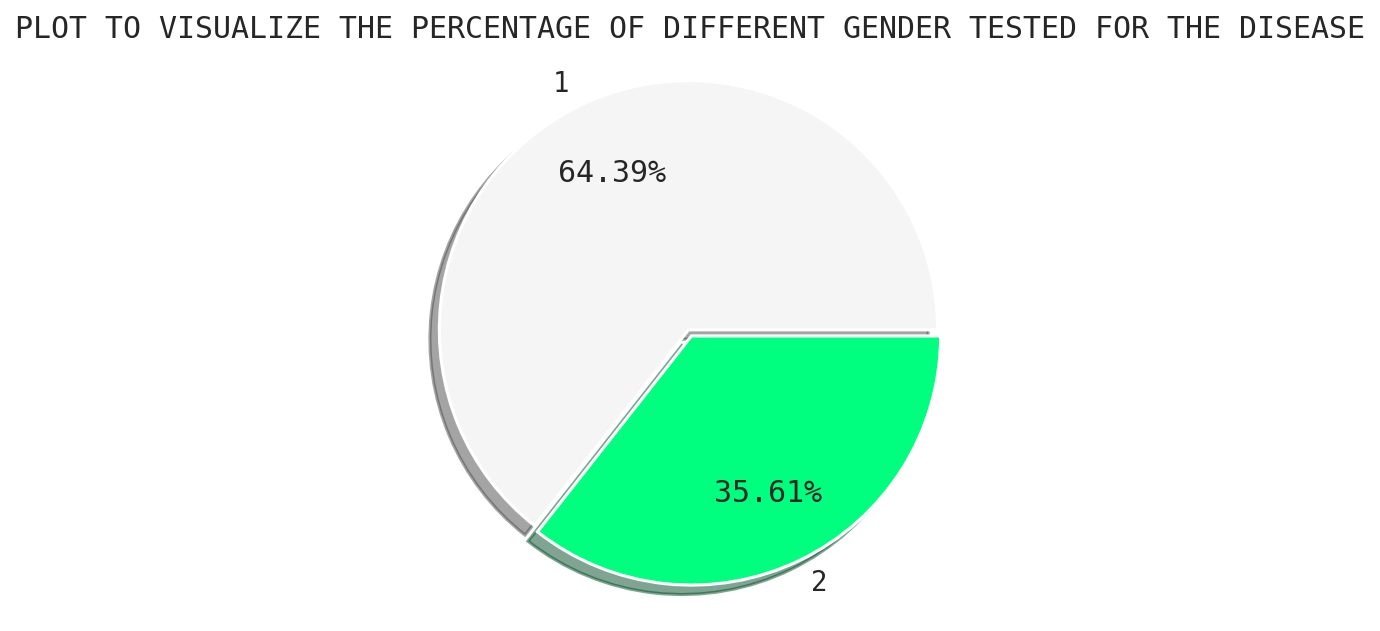

In [19]:
val=hrt['gender'].value_counts().values.tolist()
lbl=hrt['gender'].value_counts().index.tolist()
exp=(0.015,0.015)
clr=("whitesmoke",'springgreen')
plt.figure(figsize=(10,5),dpi=150)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=val,explode=exp,labels=lbl,colors=clr,autopct='%2.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF DIFFERENT GENDER TESTED FOR THE DISEASE')
plt.show()

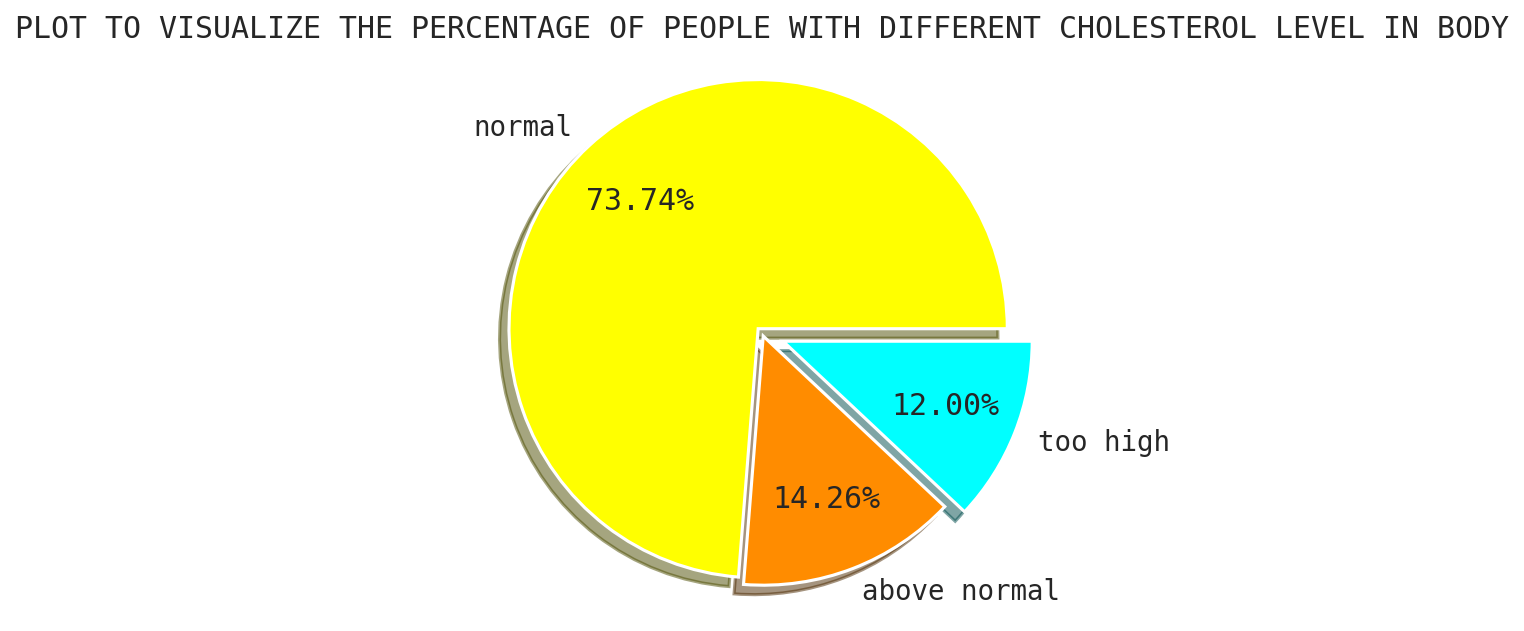

In [20]:
val=hrt['cholesterol'].value_counts().values.tolist()
lbl=['normal','above normal','too high']
exp=(0.025,0.015,0.1)
clr=("yellow",'darkorange','cyan')
plt.figure(figsize=(10,5),dpi=150)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=val,explode=exp,labels=lbl,colors=clr,autopct='%2.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE WITH DIFFERENT CHOLESTEROL LEVEL IN BODY')
plt.show()

**73.74% of people have Normal Cholesterol Level and it is Above Normal in 14.26% people while 12.00% have too high level of Cholesterol**

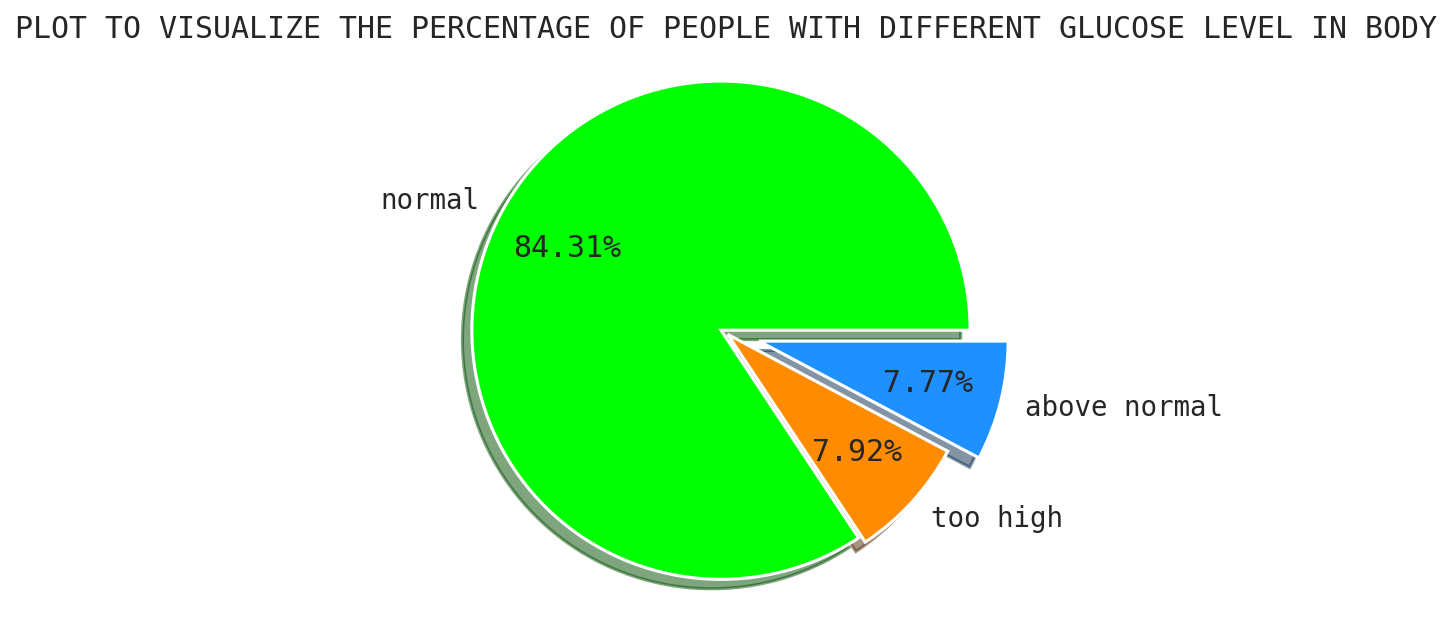

In [21]:
val=hrt['gluc'].value_counts().values.tolist()
lbl=['normal','too high','above normal']
exp=(0.025,0.01,0.15)
clr=("lime",'darkorange','dodgerblue')
plt.figure(figsize=(10,5),dpi=150)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=val,explode=exp,labels=lbl,colors=clr,autopct='%2.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE WITH DIFFERENT GLUCOSE LEVEL IN BODY')
plt.show()

**84.31% of people have Normal Glucose Level and it is Above Normal in case of 14.26% of people and too high level of Glucose is detected in 7.92% people**

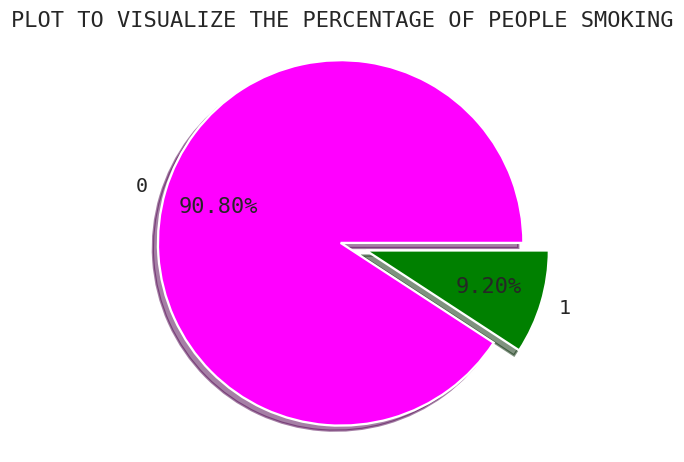

In [22]:
val=hrt['smoke'].value_counts().values.tolist()
lbl=hrt['smoke'].value_counts().index.tolist()
exp=(0.01,0.15)
clr=('magenta','green')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=val,explode=exp,labels=lbl,colors=clr,autopct='%2.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE SMOKING')
plt.show()

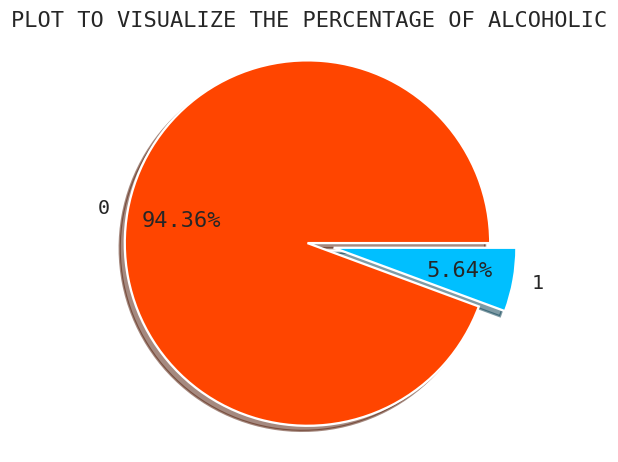

In [23]:
val=hrt['alco'].value_counts().values.tolist()
lbl=hrt['alco'].value_counts().index.tolist()
exp=(0.01,0.15)
clr=('orangered','deepskyblue')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=val,explode=exp,labels=lbl,colors=clr,autopct='%2.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF ALCOHOLIC')
plt.show()

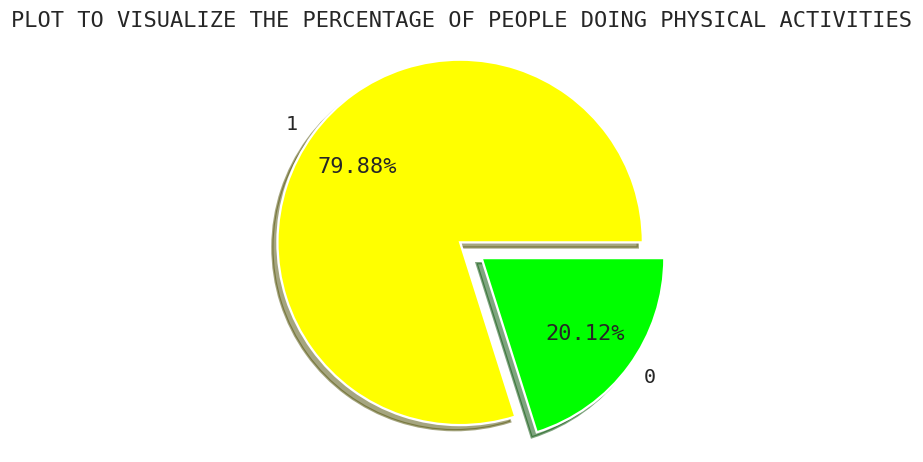

In [24]:
val=hrt['active'].value_counts().values.tolist()
lbl=hrt['active'].value_counts().index.tolist()
exp=(0.01,0.15)
clr=('yellow','lime')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=val,explode=exp,labels=lbl,colors=clr,autopct='%2.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE DOING PHYSICAL ACTIVITIES')
plt.show()

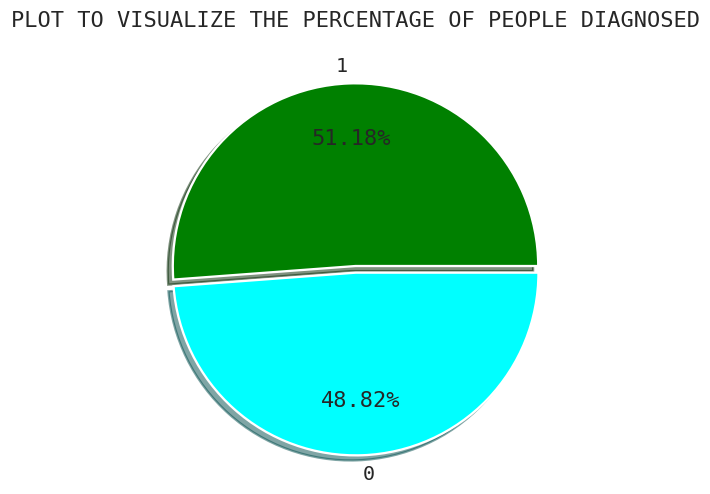

In [25]:
val=hrt['cardio'].value_counts().values.tolist()
lbl=hrt['cardio'].value_counts().index.tolist()
exp=(0,0.04)
clr=('green','aqua')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=val,explode=exp,labels=lbl,colors=clr,autopct='%2.2F%%',pctdistance=0.7, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE DIAGNOSED\n')
plt.show()

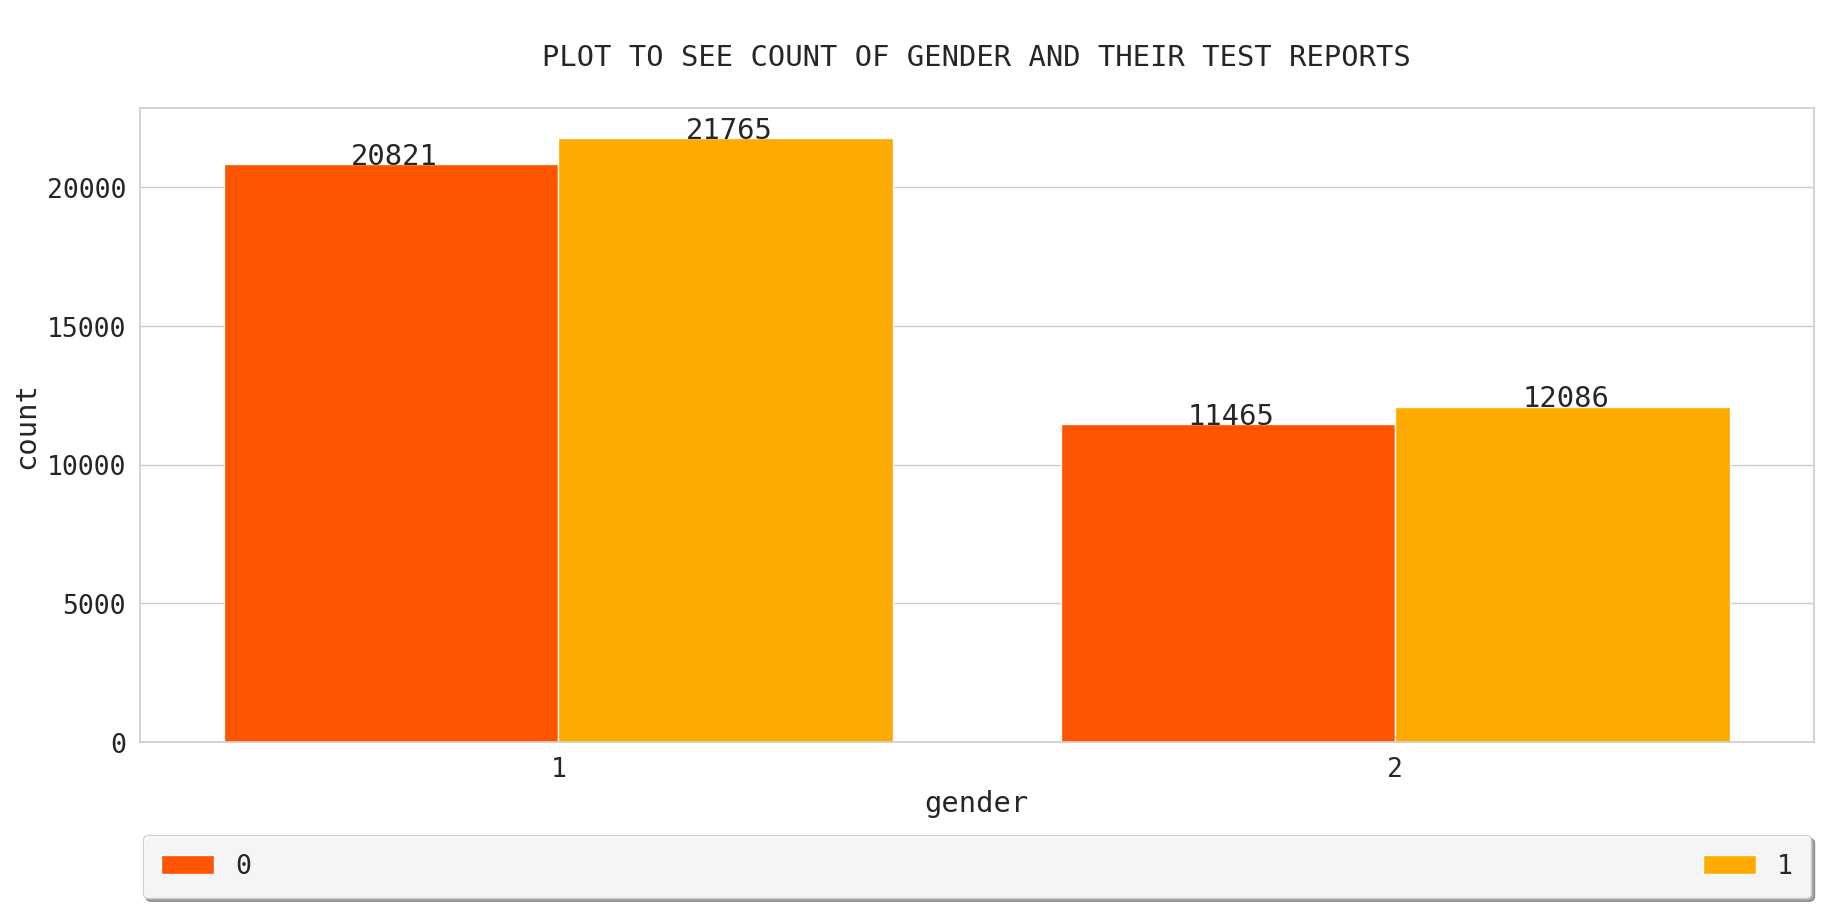

In [26]:
plt.figure(figsize=(18,7),dpi=120)
sns.set(context='paper',style='whitegrid',font='monospace',font_scale=1.8)
C1=sns.countplot(x='gender',hue="cardio",data=hrt,orient='v',palette='autumn',saturation=10)
for i in C1.patches:
    C1.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,5),
                ha='center',va='center',textcoords='offset points')
plt.title("\nPLOT TO SEE COUNT OF GENDER AND THEIR TEST REPORTS\n")
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0,-0.25,1,-0.5), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)  
plt.show()

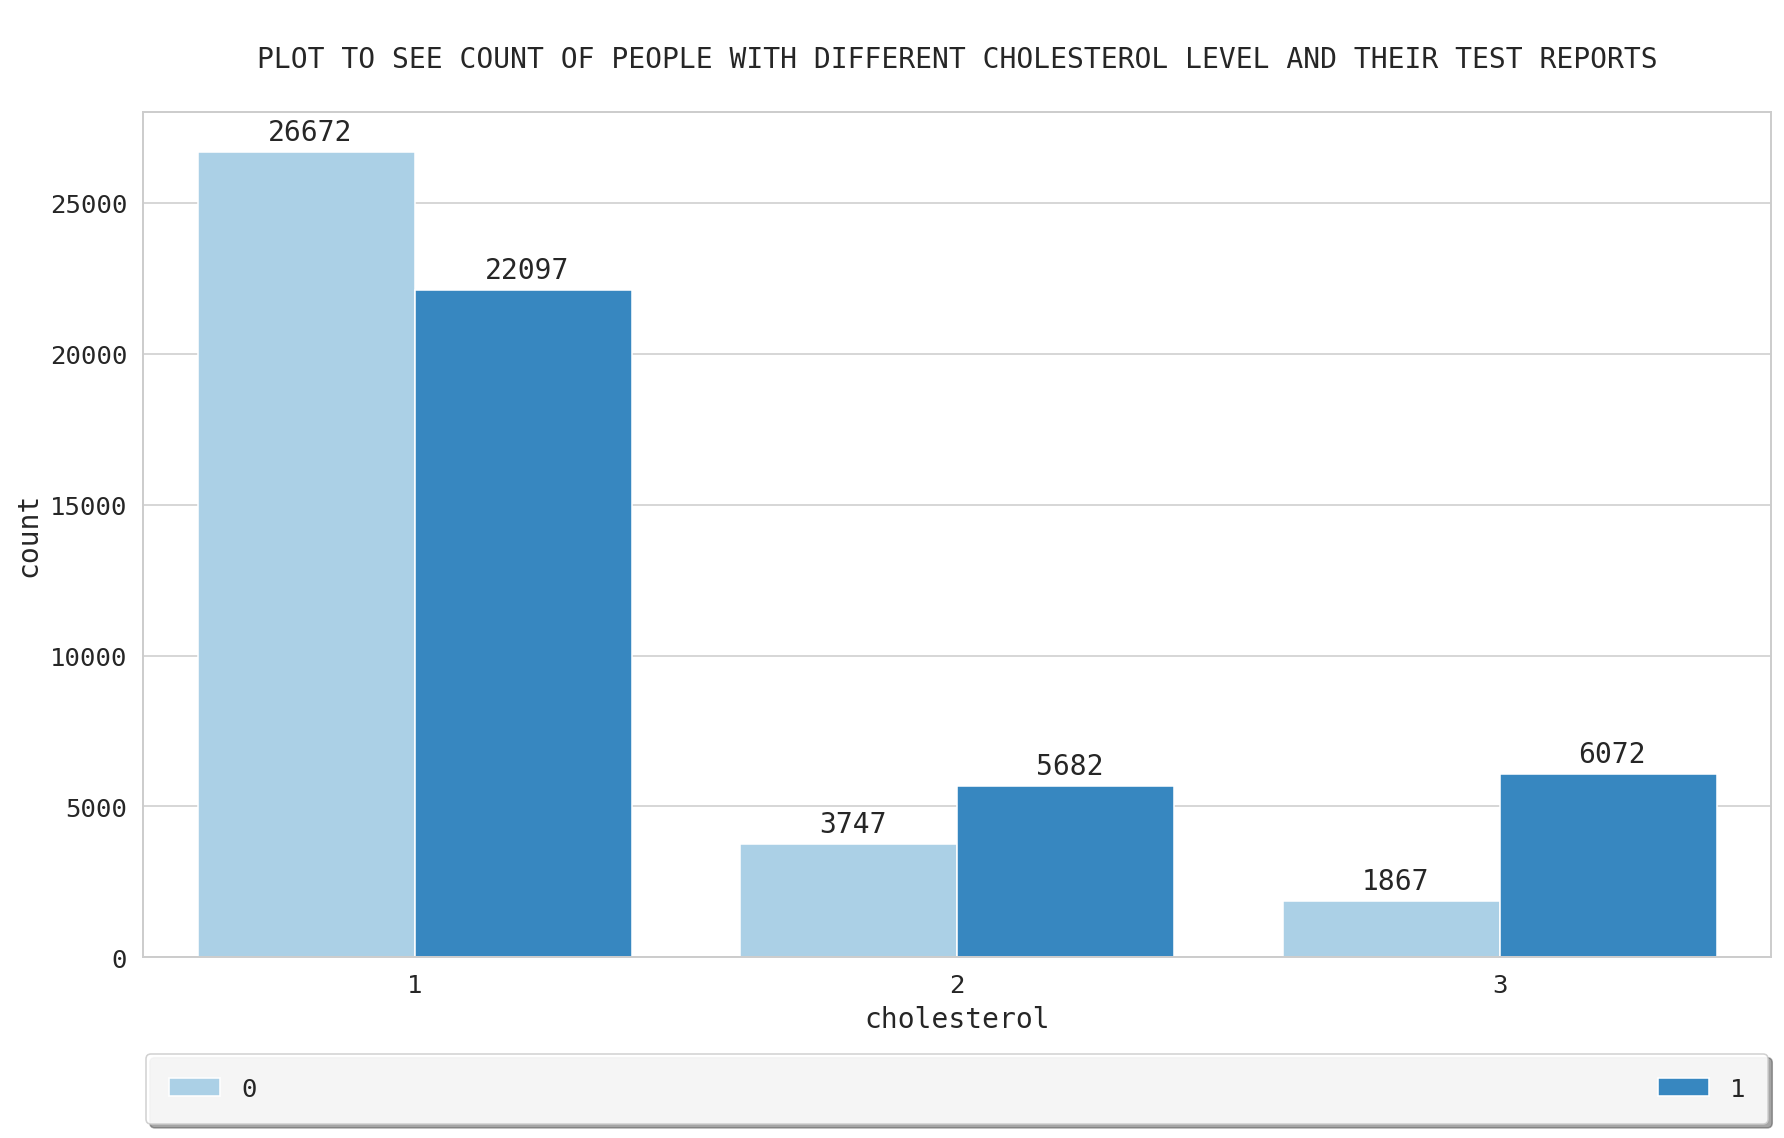

In [27]:
plt.figure(figsize=(15,8),dpi=140)
sns.set(context='paper',style='whitegrid',font='monospace',font_scale=1.5)
C1=sns.countplot(x='cholesterol',hue="cardio",data=hrt,orient='v',palette='Blues',saturation=20)
for i in C1.patches:
    C1.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,10),ha='center',va='center',textcoords='offset points')
plt.title("\nPLOT TO SEE COUNT OF PEOPLE WITH DIFFERENT CHOLESTEROL LEVEL AND THEIR TEST REPORTS\n")
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.9,bbox_to_anchor=(0,-0.20,1,-0.5), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1) 
plt.show()

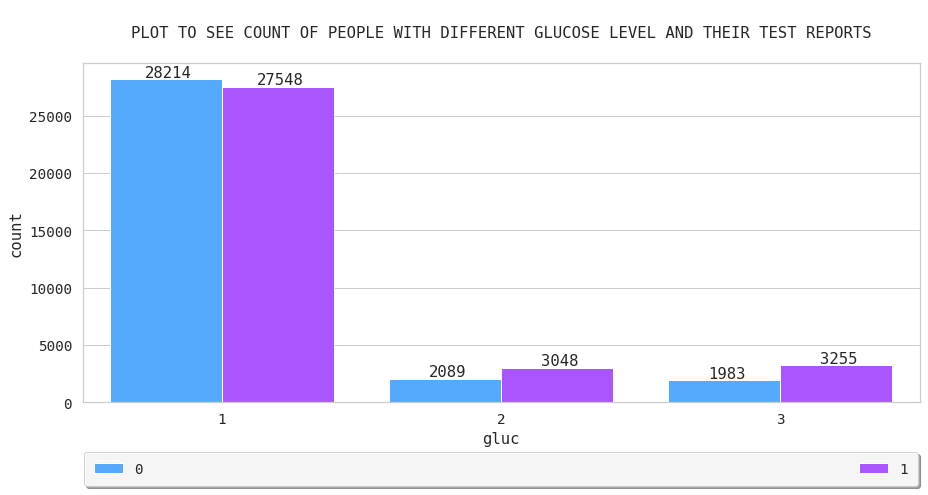

In [28]:
plt.figure(figsize=(12,5),dpi=90)
sns.set(context='paper',style='whitegrid',font='monospace',font_scale=1.3)
C1=sns.countplot(x='gluc',hue="cardio",data=hrt,orient='v',palette='cool',saturation=20)
for i in C1.patches:
    C1.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,5),ha='center',va='center',textcoords='offset points')
plt.title("\nPLOT TO SEE COUNT OF PEOPLE WITH DIFFERENT GLUCOSE LEVEL AND THEIR TEST REPORTS\n")
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0,-0.25,1,-0.5), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1) 
plt.show()

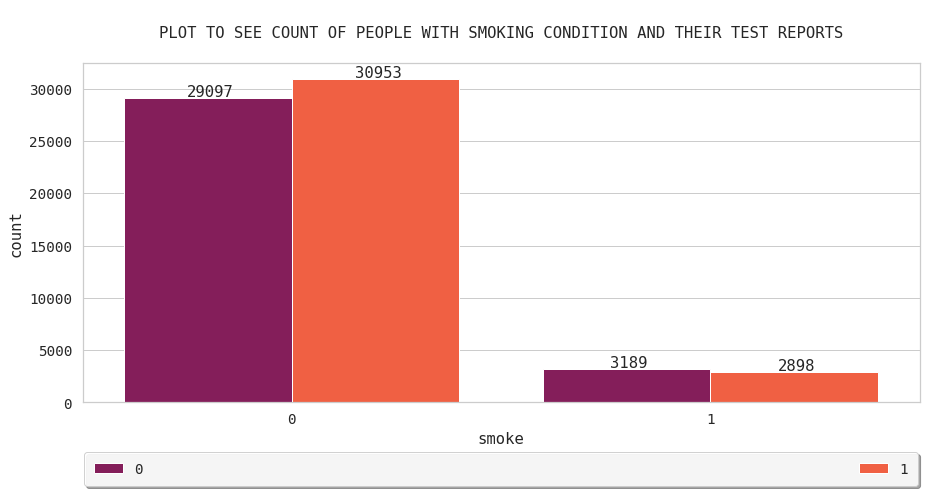

In [29]:
plt.figure(figsize=(12,5),dpi=90)
sns.set(context='paper',style='whitegrid',font='monospace',font_scale=1.3)
C1=sns.countplot(x='smoke',hue="cardio",data=hrt,orient='v',palette='rocket',saturation=20)
for i in C1.patches:
    C1.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,5),ha='center',va='center',textcoords='offset points')
plt.title("\nPLOT TO SEE COUNT OF PEOPLE WITH SMOKING CONDITION AND THEIR TEST REPORTS\n")
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0,-0.25,1,-0.5), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1) 
plt.show()

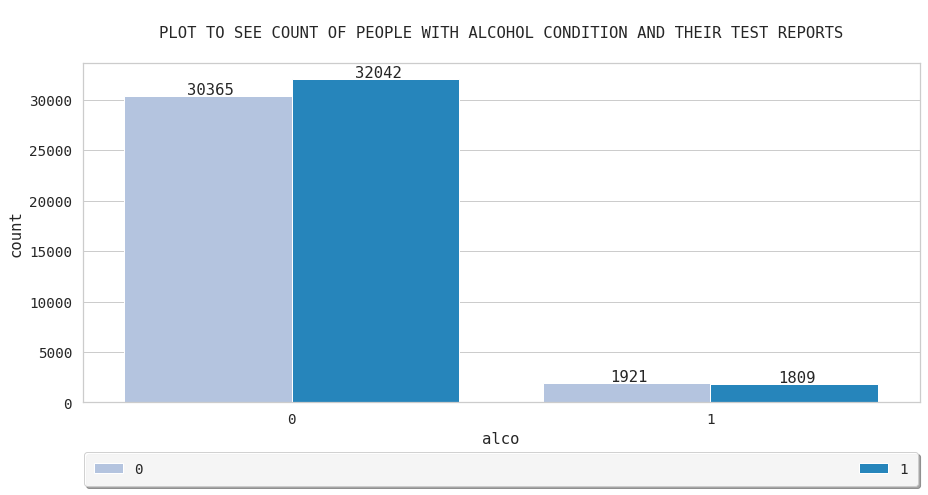

In [30]:
plt.figure(figsize=(12,5),dpi=90)
sns.set(context='paper',style='whitegrid',font='monospace',font_scale=1.3)
C1=sns.countplot(x='alco',hue="cardio",data=hrt,orient='v',palette='PuBu',saturation=20)
for i in C1.patches:
    C1.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,5),ha='center',va='center',textcoords='offset points')
plt.title("\nPLOT TO SEE COUNT OF PEOPLE WITH ALCOHOL CONDITION AND THEIR TEST REPORTS\n")
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0,-0.25,1,-0.5), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1) 
plt.show()

**Alcoholics are Vulnerable towards Cardiovascualr Disease**

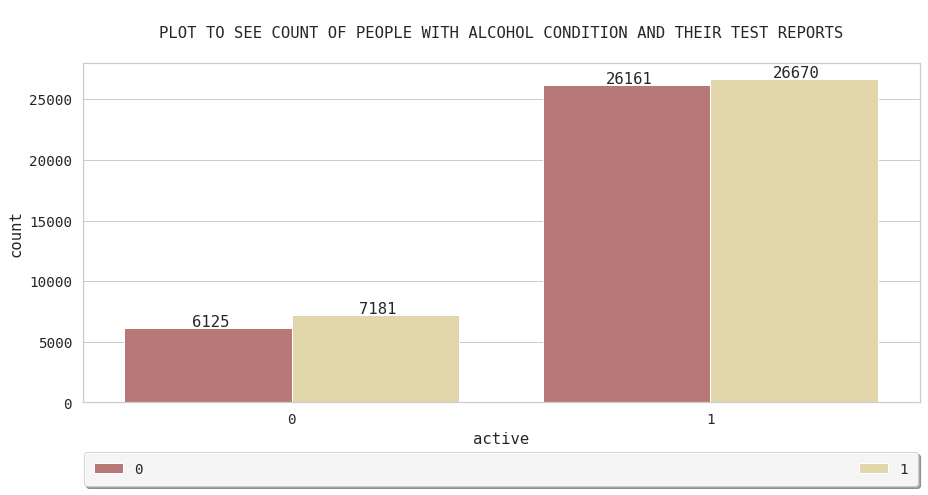

In [31]:
plt.figure(figsize=(12,5),dpi=90)
sns.set(context='paper',style='whitegrid',font='monospace',font_scale=1.3)
C1=sns.countplot(x='active',hue="cardio",data=hrt,orient='v',palette='pink',saturation=20)
for i in C1.patches:
    C1.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,5),ha='center',va='center',textcoords='offset points')
plt.title("\nPLOT TO SEE COUNT OF PEOPLE WITH ALCOHOL CONDITION AND THEIR TEST REPORTS\n")
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0,-0.25,1,-0.5), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1) 
plt.show()

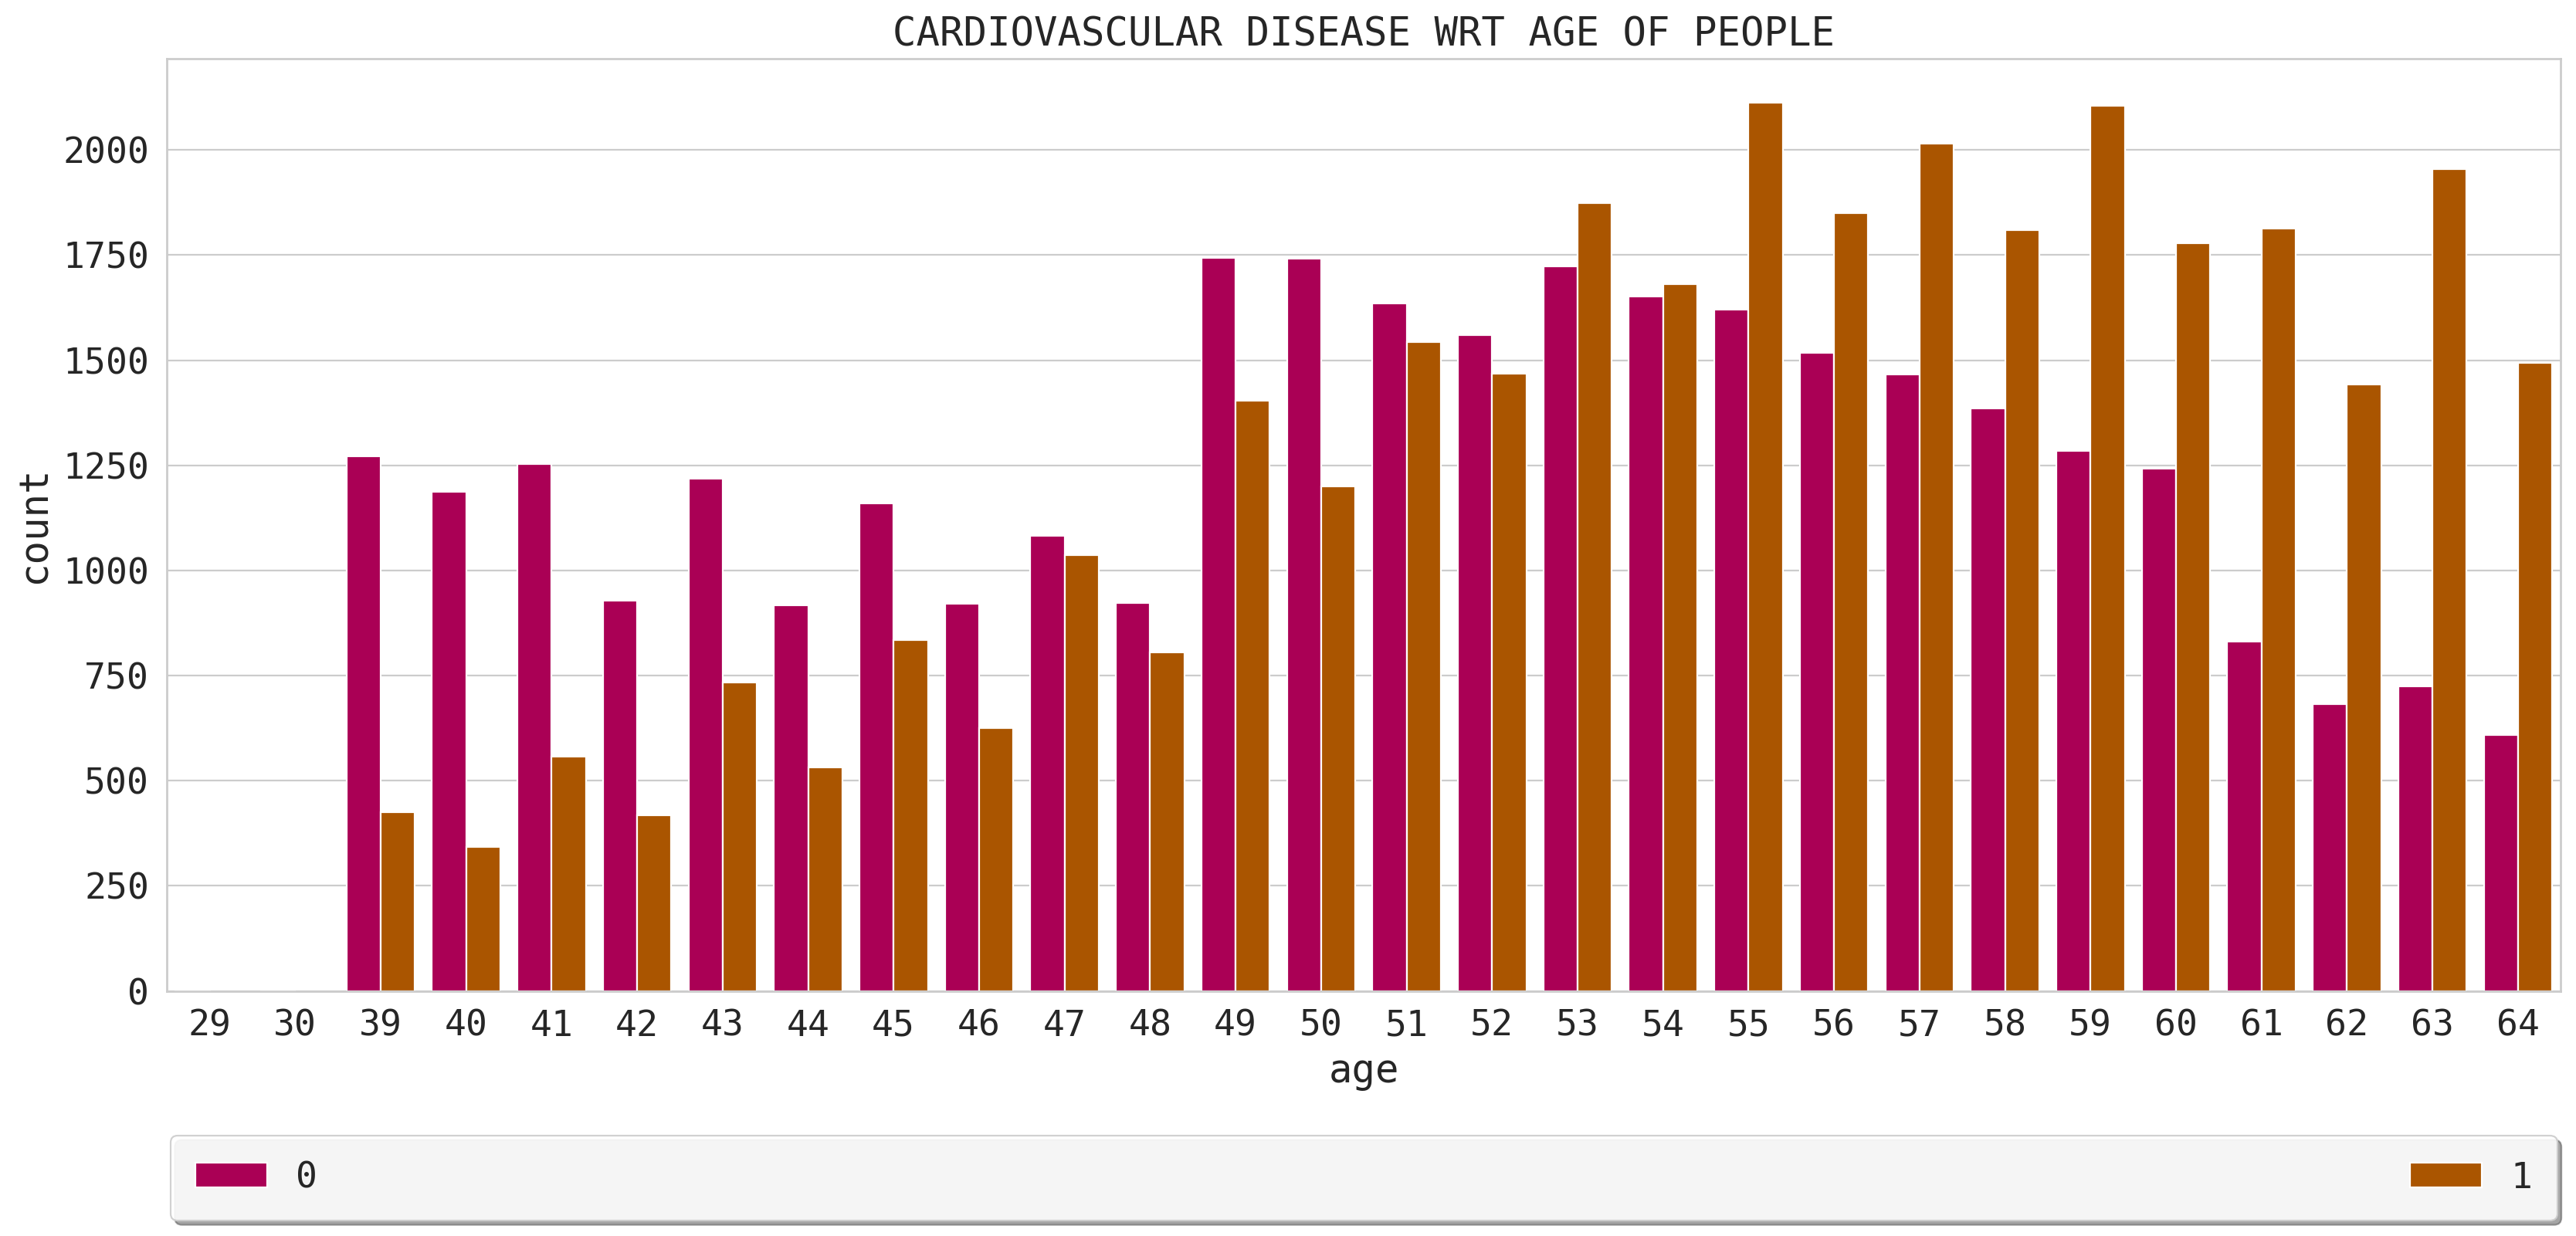

In [32]:
plt.figure(figsize=(20,8),dpi=200)
sns.set(context='paper',style='whitegrid',font='monospace',font_scale=1.9)
sns.countplot(x='age',hue="cardio",data=hrt,orient='v',palette='brg',saturation=20)
plt.title("CARDIOVASCULAR DISEASE WRT AGE OF PEOPLE")
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0,-0.25,1,-0.5), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1) 
plt.show()

**Cardiovascualr Disease Detection is high  in case of people above the age of 53**



	BARPLOT: HEIGHT vs CARDIO


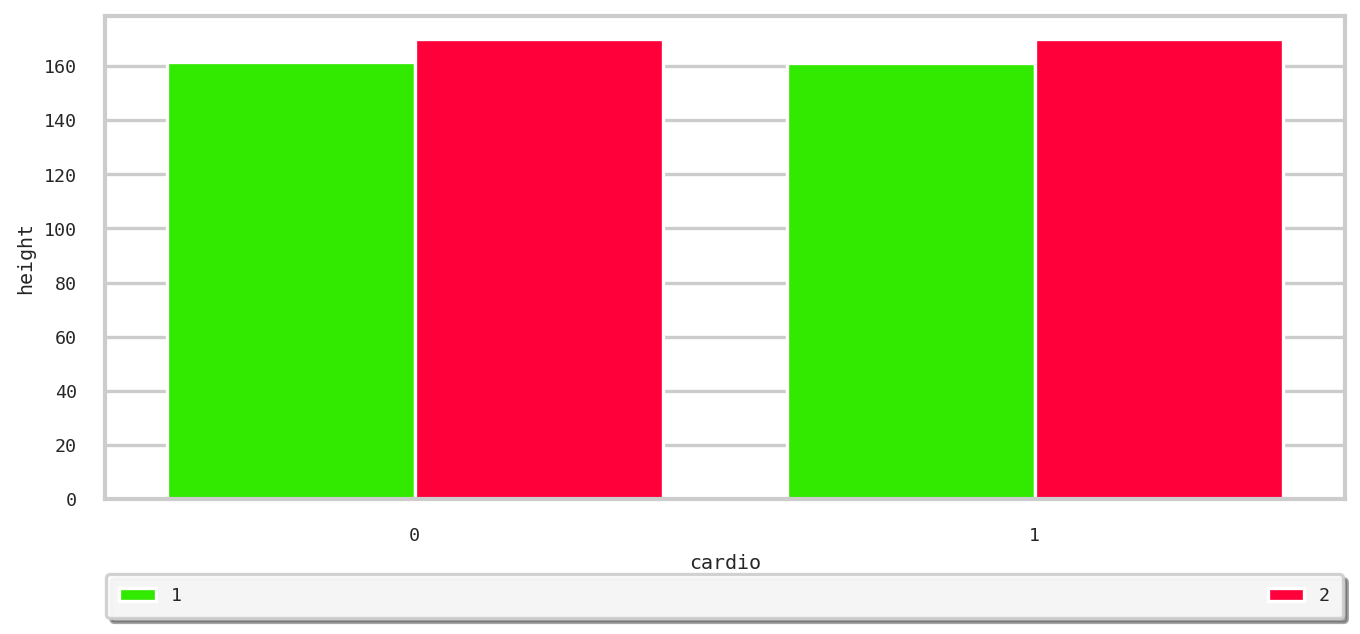



	BARPLOT: WEIGHT vs CARDIO


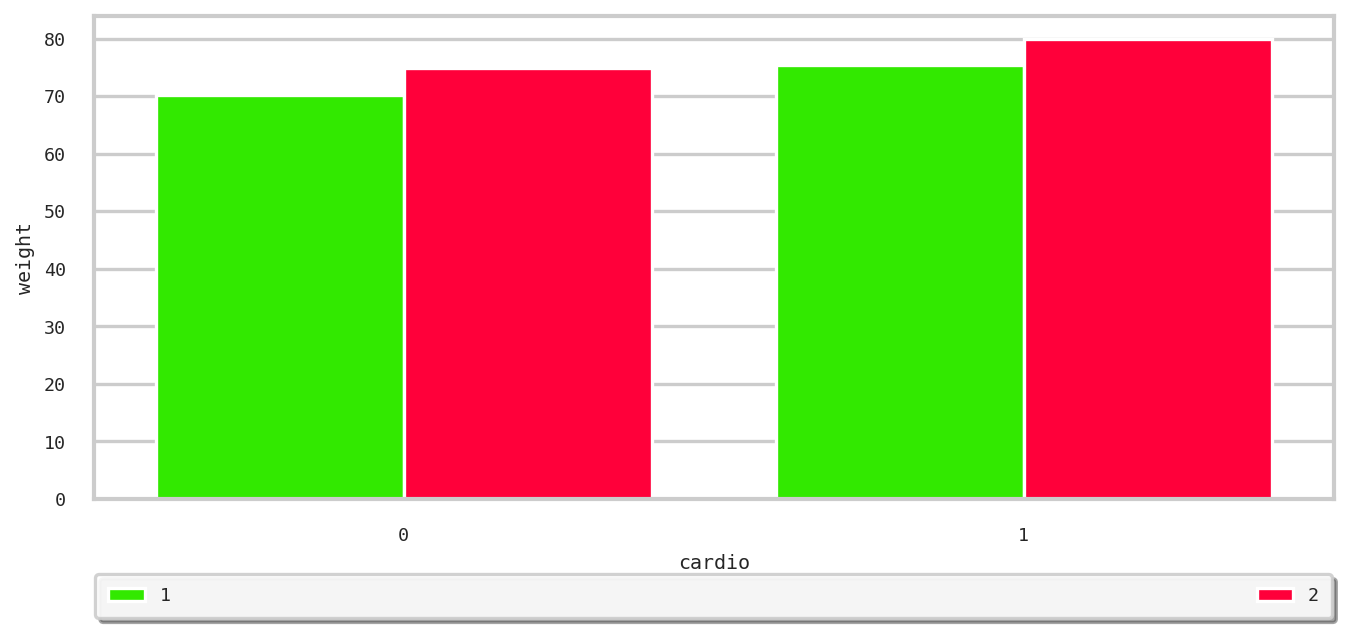



	BARPLOT: AP_HI vs CARDIO


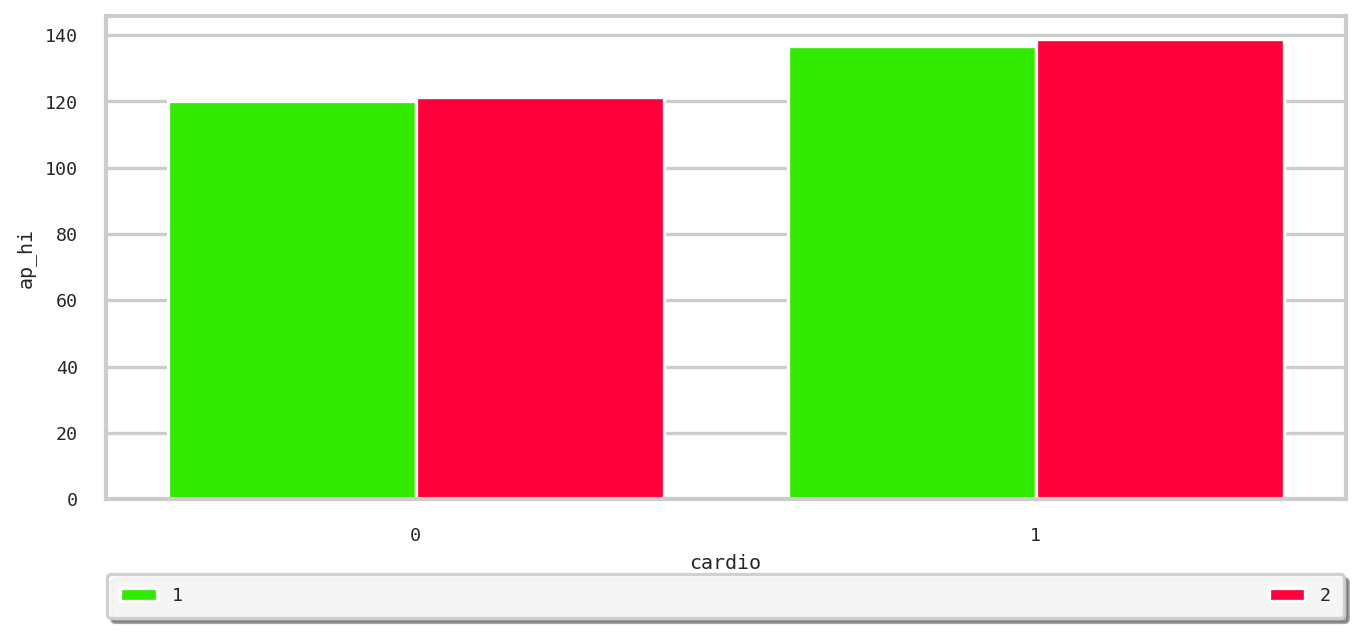



	BARPLOT: AP_LO vs CARDIO


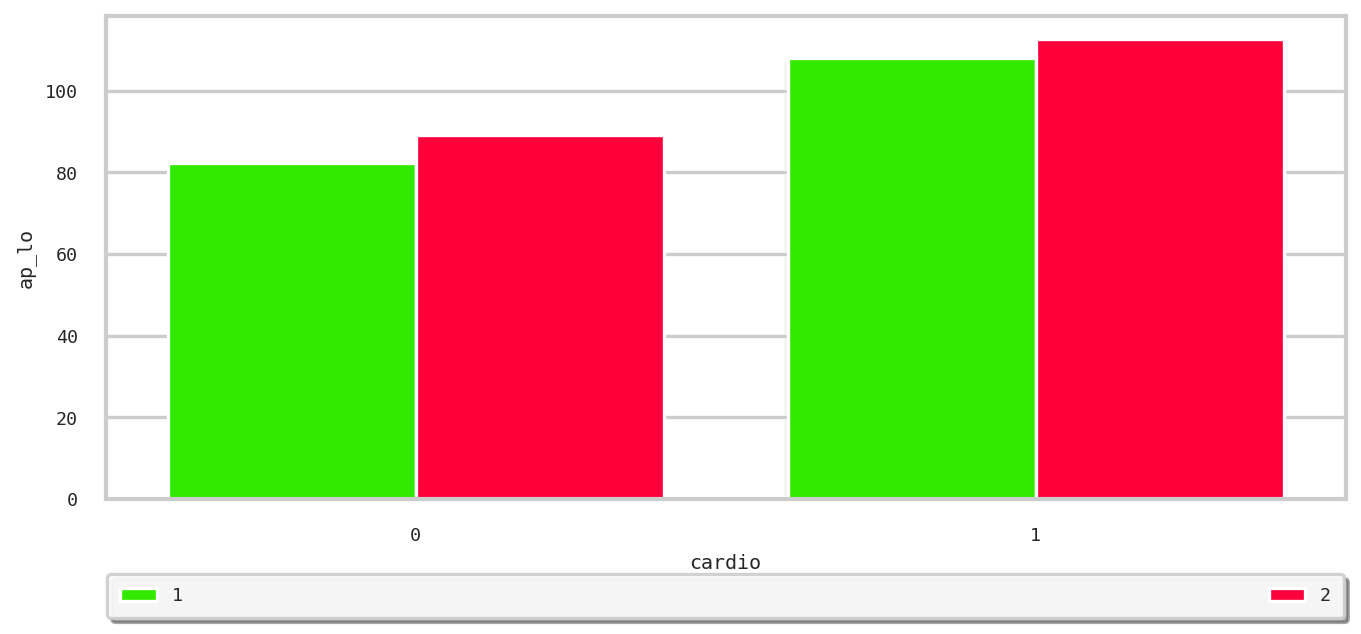

In [33]:
lis=['height', 'weight', 'ap_hi', 'ap_lo']
for i in lis:
    print("\n\n\tBARPLOT:", i.upper(),'vs CARDIO')
    plt.figure(figsize=(10,4),dpi=160)
    sns.set(context='talk',style='whitegrid',font='monospace',font_scale=.5)
    sns.barplot(x='cardio',hue='gender',y=i,data=hrt,ci=None,palette="prism",saturation=35)
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0,-0.25,1,-0.5), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1) 
    
    plt.show()
    

**It can be see that higher values of Systolic blood pressure ,Weight and Diastolic blood pressure may leads to detection of Cardiovascular Disease.**

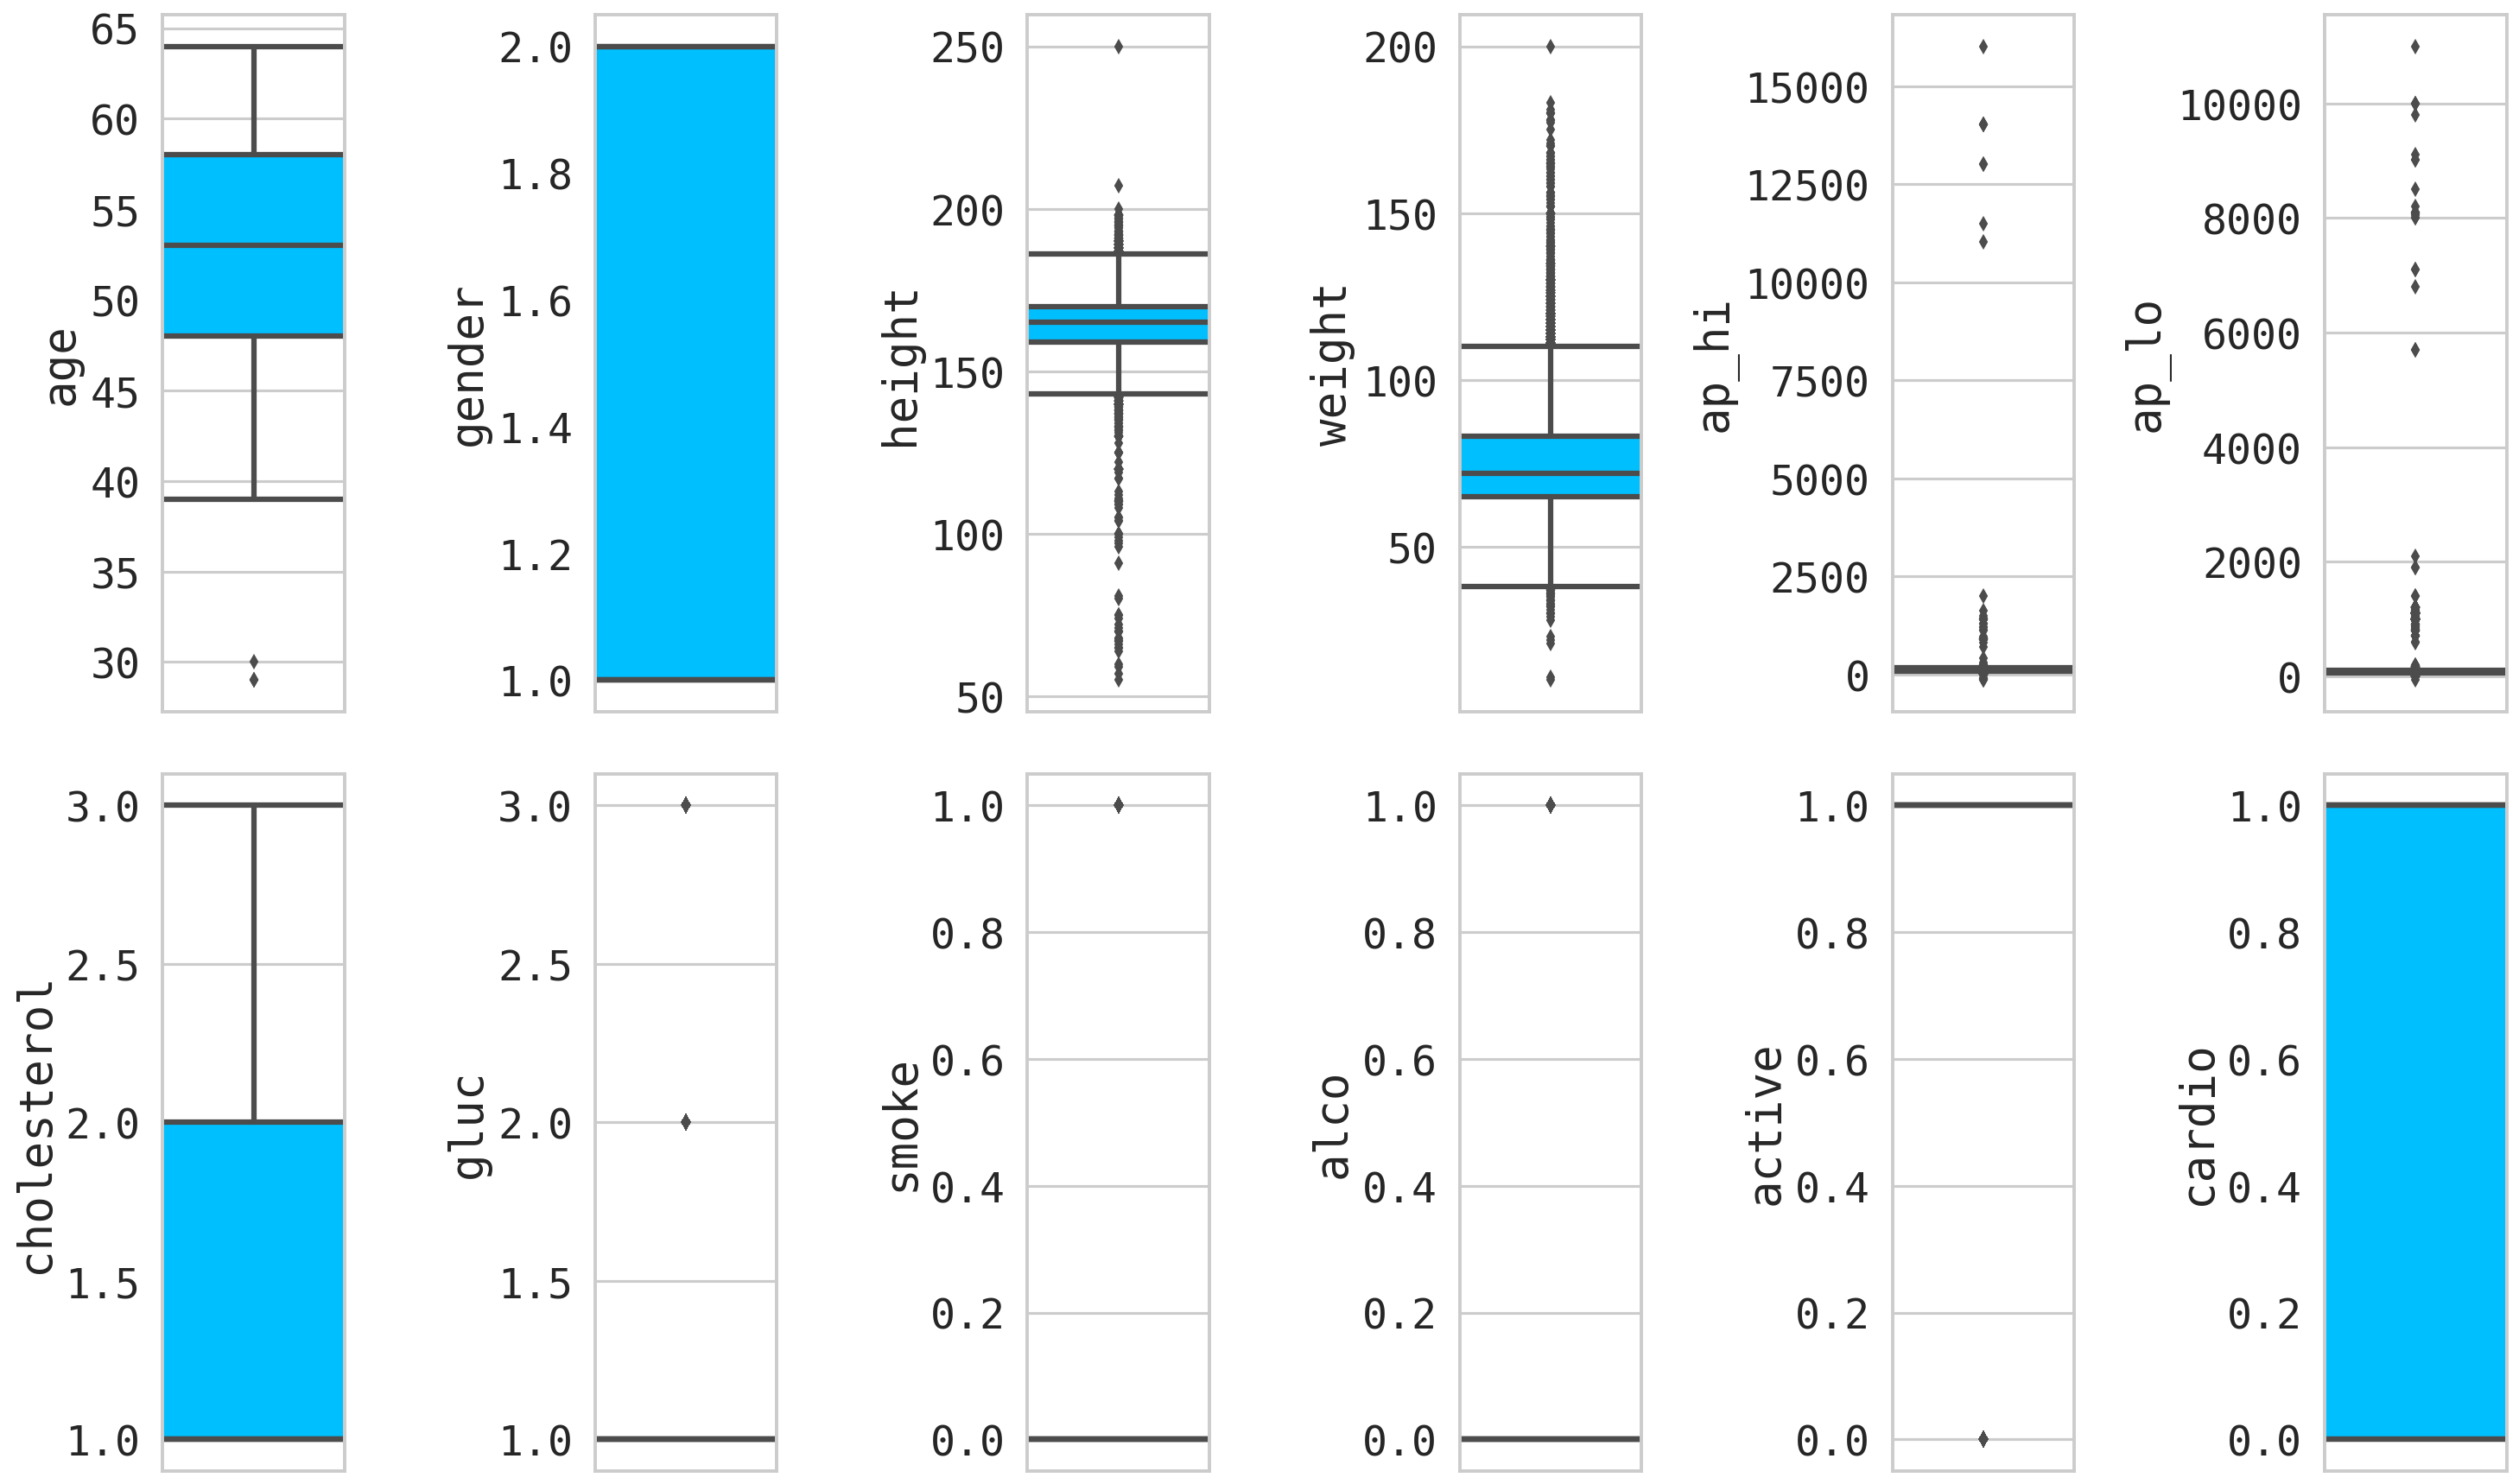

In [34]:
cl=hrt.columns.values
plt.figure(figsize=(20,12),dpi=150)
sns.set(context='talk',style='whitegrid',font='monospace',font_scale=1.4)
for i in range (0,12):
    plt.subplot(2,6,i+1)
    sns.boxplot(hrt[cl[i]],orient='v',color='deepskyblue',saturation=15,width=2,linewidth=3)
plt.tight_layout()

In [35]:
#creating a new dataframe
cvd = hrt.filter(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'], axis=1)

In [36]:
#removing outliers from ap_hi,ap_lo because the values are way too high and way too low
#keeping values falling in the range of quantile(0.01,0.97)
cvd.drop(cvd[(cvd['ap_hi'] > cvd['ap_hi'].quantile(0.98)) | (cvd['ap_hi'] < cvd['ap_hi'].quantile(0.01))].index,inplace=True)
cvd.drop(cvd[(cvd['ap_lo'] > cvd['ap_lo'].quantile(0.98)) | (cvd['ap_lo'] < cvd['ap_lo'].quantile(0.01))].index,inplace=True)

#removing outliers from weight,height because the values are way too high and way too low
##keeping values falling in the range of quantile(0.01,0.97)
cvd.drop(cvd[(hrt['height'] > cvd['height'].quantile(0.98)) | (cvd['height'] < cvd['height'].quantile(0.01))].index,inplace=True)
cvd.drop(cvd[(hrt['weight'] > cvd['weight'].quantile(0.98)) | (cvd['weight'] < cvd['weight'].quantile(0.01))].index,inplace=True)




In [37]:
print('The shape before outlier removal:\t',hrt.shape,'\nThe shape after outlier removal:\t',cvd.shape,
      '\nSo a total of',len(hrt)-len(cvd),'rows has been removed')

The shape before outlier removal:	 (66137, 12) 
The shape after outlier removal:	 (59860, 12) 
So a total of 6277 rows has been removed


In [38]:
cvd.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,59860.000000,59860.000000,59860.000000,59860.000000,59860.000000,59860.000000,59860.000000,59860.000000,59860.000000,59860.000000,59860.000000,59860.000000
mean,52.830104,1.347962,164.258236,73.439261,125.887521,80.918226,1.369963,1.230104,0.089392,0.054360,0.798730,0.498212
std,6.803085,0.476328,7.193830,12.314774,15.144228,8.793020,0.681742,0.576910,0.285311,0.226729,0.400952,0.500001
min,29.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,181.000000,109.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


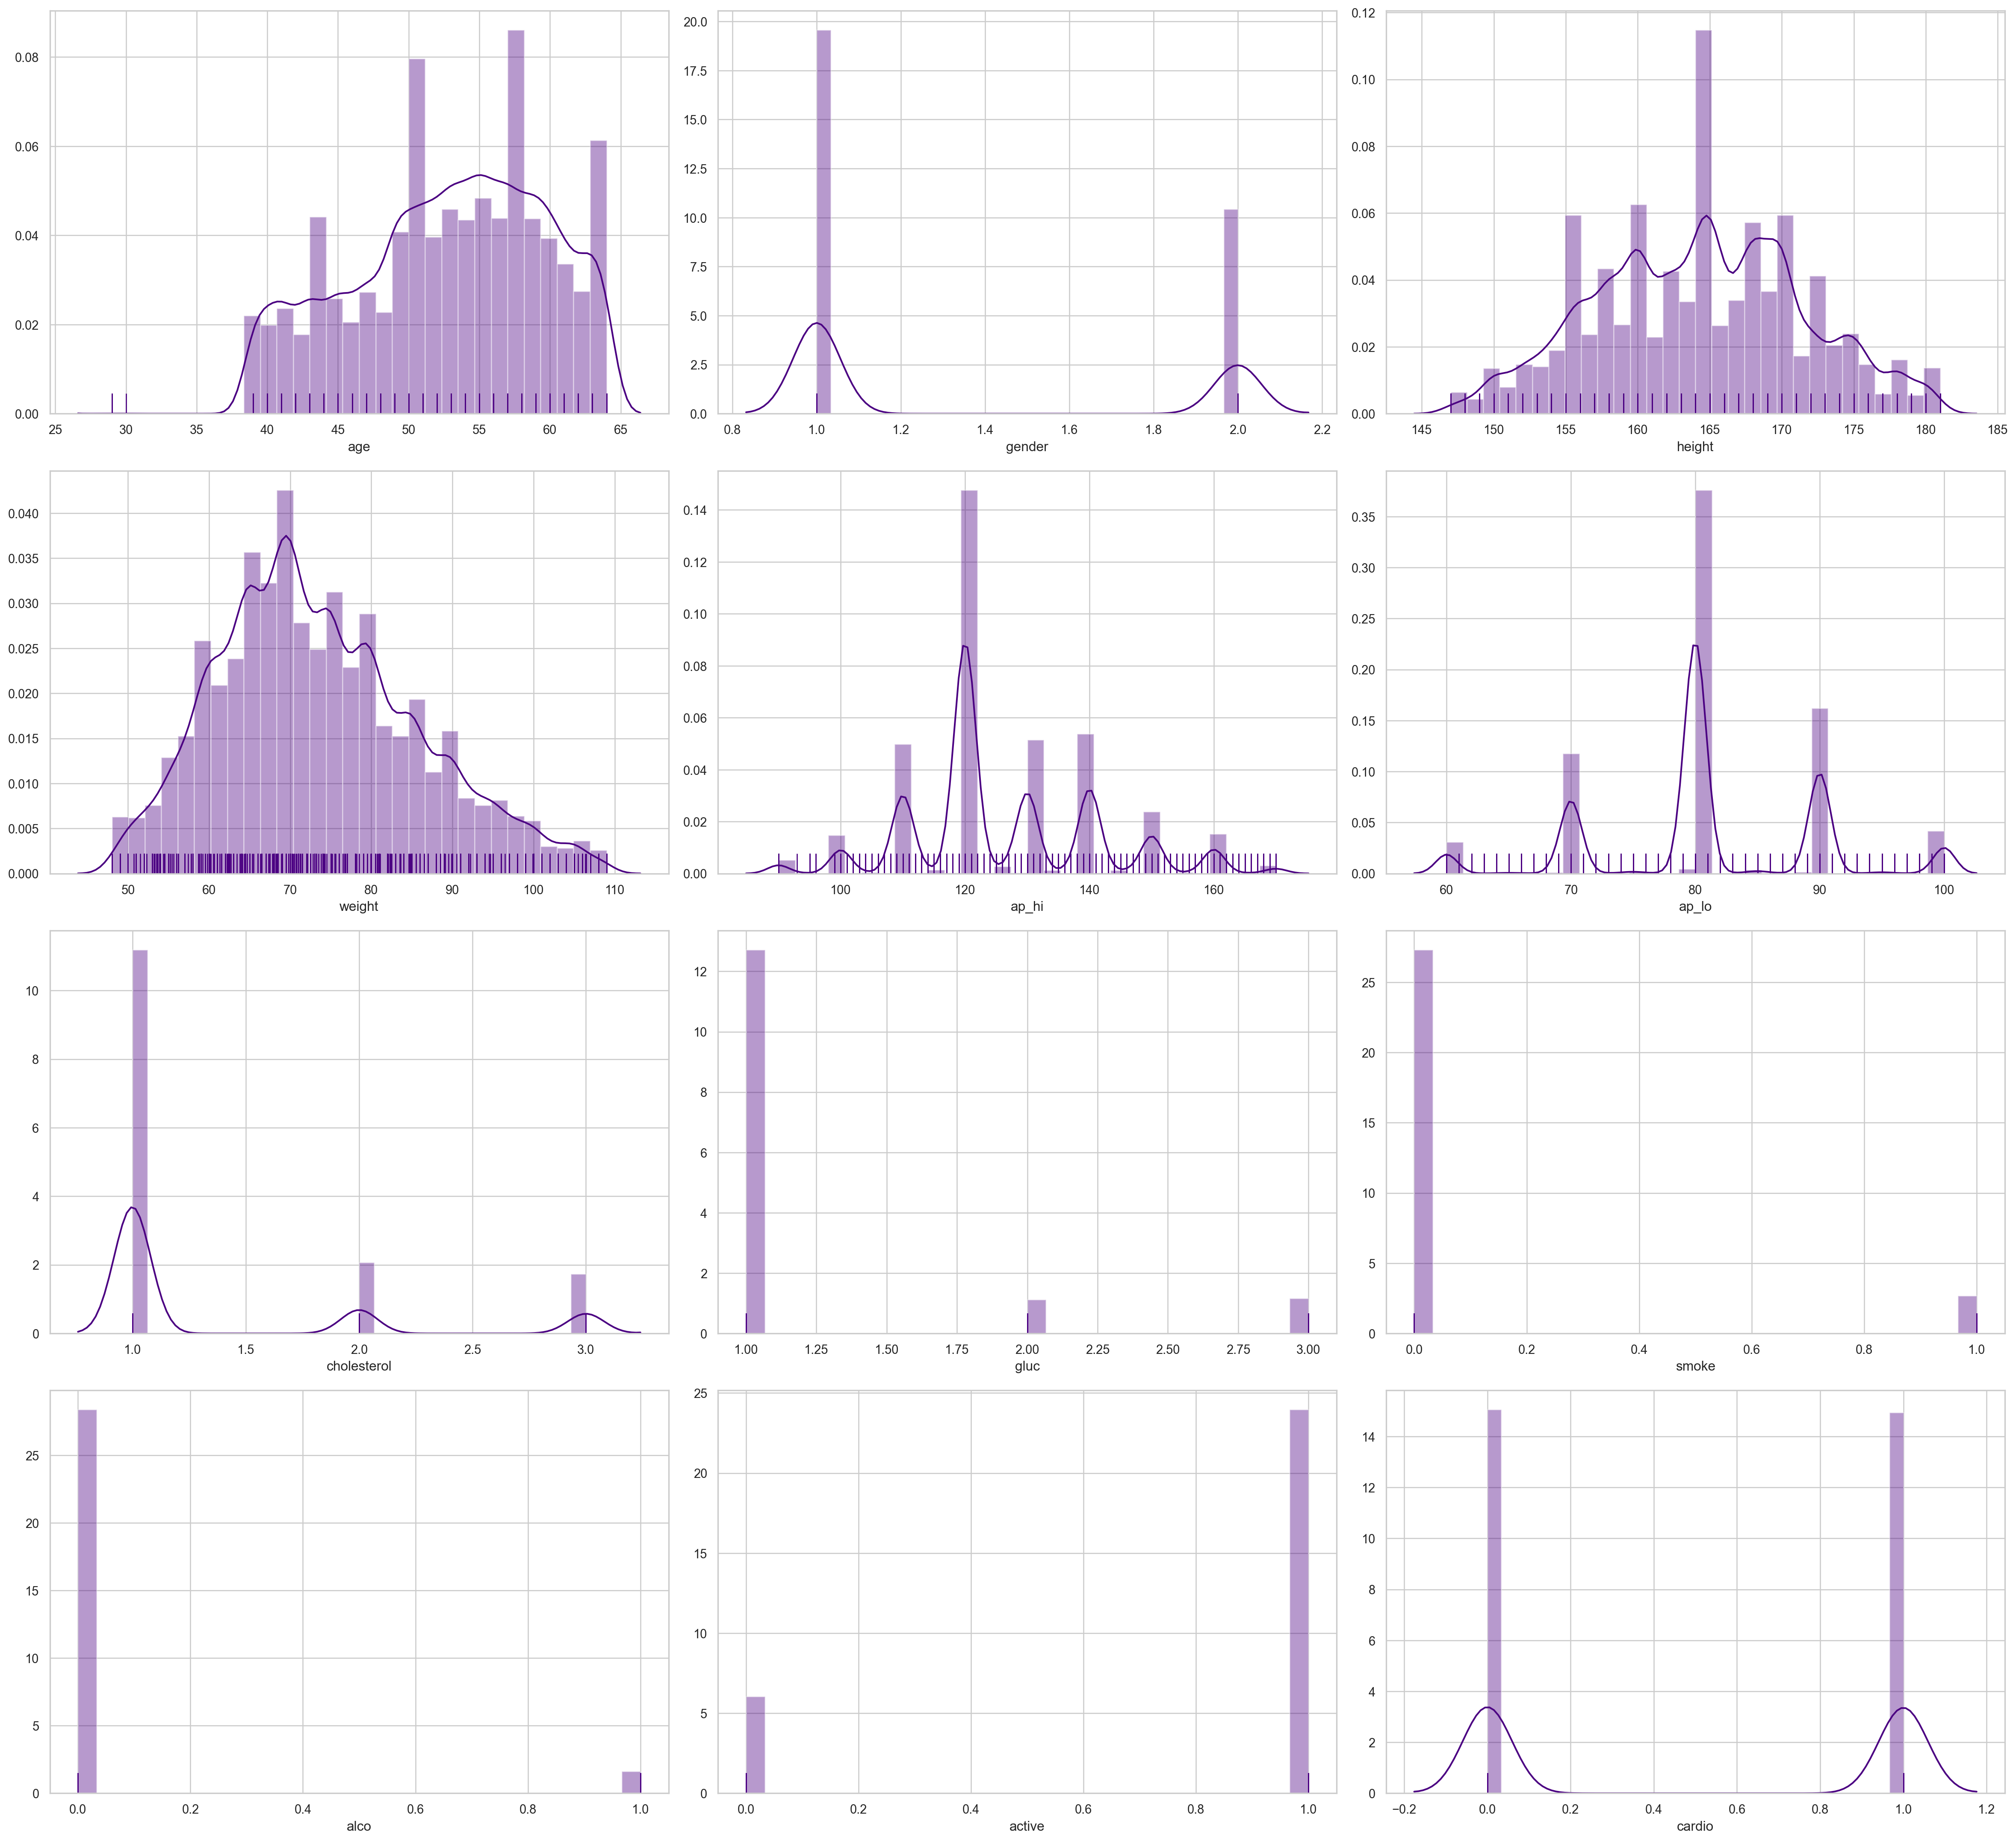

In [39]:
#using distplot to view distribution of all attributes
cl=cvd.columns.values
plt.figure(figsize=(25,28),dpi=190)
sns.set_context('talk',font_scale=2)
sns.set(style='whitegrid')
for i in range (0,12):
    plt.subplot(5,3,i+1)
    sns.distplot(cvd[cl[i]],color='indigo',kde=True,rug=True,hist=True,bins=30)
plt.tight_layout()

In [40]:
cvd.skew()

age           -0.300156
gender         0.638397
height         0.018969
weight         0.465645
ap_hi          0.507422
ap_lo         -0.045258
cholesterol    1.573387
gluc           2.370629
smoke          2.878416
alco           3.931168
active        -1.490154
cardio         0.007150
dtype: float64

cant remove the skew here as smoker,alcoholic,active,glucose and cholesterol as they represents categories.

In [41]:
#co_relation
cvd_cr=cvd.corr()
cvd_cr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.021468,-0.084127,0.068599,0.219817,0.163194,0.157114,0.098557,-0.048748,-0.027988,-0.011115,0.240740
gender,-0.021468,1.000000,0.512784,0.131897,0.049270,0.056496,-0.049025,-0.029718,0.340268,0.169497,0.011480,-0.005701
height,-0.084127,0.512784,1.000000,0.273628,0.007296,0.022944,-0.065371,-0.026893,0.192571,0.093408,-0.007117,-0.020238
weight,0.068599,0.131897,0.273628,1.000000,0.242937,0.229366,0.123335,0.085984,0.052368,0.057934,-0.008650,0.163473
ap_hi,0.219817,0.049270,0.007296,0.242937,1.000000,0.717705,0.181898,0.078212,0.014672,0.023733,0.007761,0.432223
ap_lo,0.163194,0.056496,0.022944,0.229366,0.717705,1.000000,0.149113,0.062576,0.016918,0.027687,0.002653,0.335891
cholesterol,0.157114,-0.049025,-0.065371,0.123335,0.181898,0.149113,1.000000,0.443666,-0.001432,0.024873,0.015543,0.211553
gluc,0.098557,-0.029718,-0.026893,0.085984,0.078212,0.062576,0.443666,1.000000,-0.014441,0.001053,-0.000990,0.079843
smoke,-0.048748,0.340268,0.192571,0.052368,0.014672,0.016918,-0.001432,-0.014441,1.000000,0.338084,0.031543,-0.029620
alco,-0.027988,0.169497,0.093408,0.057934,0.023733,0.027687,0.024873,0.001053,0.338084,1.000000,0.029758,-0.018890


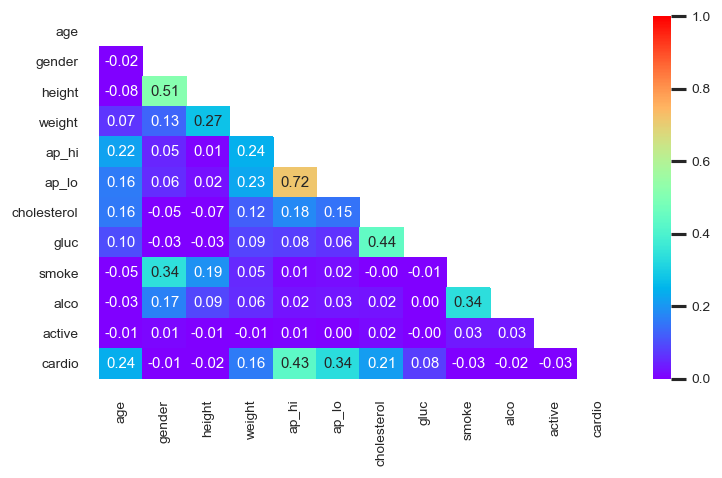

In [42]:
#heatmap
mask = np.triu(np.ones_like(cvd_cr, dtype=np.bool))

plt.figure(dpi=120,figsize=(7,4))
sns.set_context('talk',font_scale=0.5)
sns.heatmap(cvd_cr,annot=True,fmt='.2f',cmap='rainbow',vmax=1,vmin=0,mask=mask)
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler #FOR STANDARD SCALING OF INPUTS
from sklearn.model_selection import train_test_split,cross_val_score as cvs ,RandomizedSearchCV as rsv
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score,mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [44]:
cvd.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69.0,130,80,2,2,0,0,1,0
1,40,1,163,71.0,110,70,1,1,0,0,1,1
2,60,1,165,70.0,120,80,1,1,0,0,1,0


In [45]:
x=cvd.drop(['cardio'],axis=1)
y=cvd['cardio']

In [46]:
x.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,61,1,155,69.0,130,80,2,2,0,0,1
1,40,1,163,71.0,110,70,1,1,0,0,1
2,60,1,165,70.0,120,80,1,1,0,0,1


In [47]:
y.head(3)

0    0
1    1
2    0
Name: cardio, dtype: int64

In [48]:
ss=StandardScaler()
x=ss.fit_transform(x)
print(x)

[[ 1.20092057 -0.73051539 -1.28697977 ... -0.31331657 -0.23976045
   0.50198302]
 [-1.8859401  -0.73051539 -0.17490634 ... -0.31331657 -0.23976045
   0.50198302]
 [ 1.0539272  -0.73051539  0.10311202 ... -0.31331657 -0.23976045
   0.50198302]
 ...
 [ 0.61294711 -0.73051539  0.10311202 ... -0.31331657 -0.23976045
   0.50198302]
 [ 1.20092057 -0.73051539 -0.17490634 ... -0.31331657 -0.23976045
  -1.99209927]
 [ 0.46595374 -0.73051539  0.79815791 ... -0.31331657 -0.23976045
   0.50198302]]


In [49]:
y=np.array(y)
y=y.reshape(-1,1)
print(y.shape)

(59860, 1)


In [50]:
print('shape of x=', x.shape,'\nshape of y=', y.shape)

shape of x= (59860, 11) 
shape of y= (59860, 1)


In [51]:
accuracy = []
precision = []
recall = []
RMSE = []
MSE = []
cv_acc=[]

def acusr(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc=accuracy_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        pre=precision_score(y_test,pred)
        rec=recall_score(y_test,pred)
        mse=mean_squared_error(y_test,pred)
        rmse=np.sqrt(mse)
        
        if acc>max_ac_score:
            max_ac_score=acc
            final_rst=rst
    print("In this",model,'\n\nThe best suited RANDOM SCORE=',final_rst, '\n\nACCURACY SCORE:', max_ac_score)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nPRECISION:\n',pre)
    print('\nRECALL:\n',rec)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    
    accuracy.append(max_ac_score)
    precision.append(pre)
    recall.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)

**LOGISTIC REGRESSION**

In [52]:
logi=LogisticRegression()
acusr(logi,x,y)

In this LogisticRegression() 

The best suited RANDOM SCORE= 146 

ACCURACY SCORE: 0.728087760329658

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      8851
           1       0.75      0.67      0.71      9107

    accuracy                           0.72     17958
   macro avg       0.72      0.72      0.72     17958
weighted avg       0.72      0.72      0.72     17958


CONFUSION MATRIX:
 [[6841 2010]
 [3021 6086]]

PRECISION:
 0.7517292490118577

RECALL:
 0.6682771494454814

MEAN SQUARED ERROR:
 0.28015369194787837

ROOT MEAN SQ. ERROR:
 0.5292954675300728


In [53]:
#using cross_val_score to check for over/under fitting of logistic regressor model
logi_accuracy=cvs(logi,x,y,scoring='accuracy',cv=80)
print('THE ACCURACY SCORE AT LOGISTIC MODEL IS=', logi_accuracy.mean())
cv_acc.append(logi_accuracy.mean())

THE ACCURACY SCORE AT LOGISTIC MODEL IS= 0.7213168359952308


**DECISION TREE CLASSIFIER**

In [54]:
#using RandomizedSearchCV to get best parameters for optimum performance of DTC model

dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10),'min_samples_split':range(2,8)}
dtc_rs=rsv(dtc,dtc_para,cv=90)
dtc_rs.fit(x,y)
print(dtc_rs,'\n')
print(dtc_rs.best_score_,'\n')
print(dtc_rs.best_params_)

RandomizedSearchCV(cv=90, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(4, 10),
                                        'min_samples_split': range(2, 8),
                                        'splitter': ['best', 'random']}) 

0.7261611987927777 

{'splitter': 'best', 'min_samples_split': 4, 'max_depth': 7, 'criterion': 'gini'}


In [55]:
dtc=DecisionTreeClassifier(splitter='best',min_samples_split=4,max_depth=7,criterion='gini')
acusr(dtc,x,y)

In this DecisionTreeClassifier(max_depth=7, min_samples_split=4) 

The best suited RANDOM SCORE= 146 

ACCURACY SCORE: 0.7314288896313621

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      8851
           1       0.75      0.67      0.71      9107

    accuracy                           0.72     17958
   macro avg       0.72      0.72      0.72     17958
weighted avg       0.72      0.72      0.72     17958


CONFUSION MATRIX:
 [[6841 2010]
 [2994 6113]]

PRECISION:
 0.7525544749476795

RECALL:
 0.6712419018337542

MEAN SQUARED ERROR:
 0.2786501837621116

ROOT MEAN SQ. ERROR:
 0.5278732648677252


In [56]:
#using cross_val_score to check for over/under fitting of DTC model
dtc_accuracy=cvs(dtc,x,y,scoring='accuracy',cv=80)

print('THE ACCURACY SCORE AT DTC MODEL IS=', dtc_accuracy.mean())
cv_acc.append(dtc_accuracy.mean())

THE ACCURACY SCORE AT DTC MODEL IS= 0.7258449099690854


**K_NEIGHBORS CLASSIFIER**

In [57]:
#using KNeighborsClassifier algo with RandomizedSearchCV to get best parameters for optimum performance
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,50),'algorithm':['ball_tree','kd_tree']}
knc_rsv=rsv(knc,knc_para,cv=80)
knc_rsv.fit(x,y)
print(knc_rsv)
print('\nbest score=',knc_rsv.best_score_)
print('\nbest parameters for KNC=\n',knc_rsv.best_params_)

RandomizedSearchCV(cv=80, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'n_neighbors': range(20, 50)})

best score= 0.7210497017413593

best parameters for KNC=
 {'n_neighbors': 44, 'algorithm': 'ball_tree'}


In [58]:
knc=KNeighborsClassifier(n_neighbors=44,algorithm='ball_tree')
acusr(knc,x,y)

In this KNeighborsClassifier(algorithm='ball_tree', n_neighbors=44) 

The best suited RANDOM SCORE= 146 

ACCURACY SCORE: 0.7313175186546386

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      8851
           1       0.76      0.65      0.70      9107

    accuracy                           0.72     17958
   macro avg       0.72      0.72      0.72     17958
weighted avg       0.72      0.72      0.72     17958


CONFUSION MATRIX:
 [[6932 1919]
 [3176 5931]]

PRECISION:
 0.7555414012738854

RECALL:
 0.6512572746239157

MEAN SQUARED ERROR:
 0.28371756320302927

ROOT MEAN SQ. ERROR:
 0.5326514462601498


In [59]:
#using cross_val_score to check for over/under fitting of KNC model
knc_accuracy=cvs(knc,x,y,scoring='accuracy',cv=80)

print('THE ACCURACY SCORE AT KNC MODEL IS=', knc_accuracy.mean())
cv_acc.append(knc_accuracy.mean())

THE ACCURACY SCORE AT KNC MODEL IS= 0.7210497017413593


**RANDOM FOREST CLASSIFIER**

In [60]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[300,350],'max_depth':[6,9],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=90)
rfc_rsv.fit(x,y)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=90, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [6, 9],
                                        'n_estimators': [300, 350]})

best score= 0.7278150832536798

best parameters for RFC=
 {'n_estimators': 300, 'max_depth': 9, 'criterion': 'entropy'}


In [61]:
rfc=RandomForestClassifier(n_estimators=300,max_depth=9,criterion='entropy')
acusr(rfc,x,y)

In this RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=300) 

The best suited RANDOM SCORE= 146 

ACCURACY SCORE: 0.7351041318632364

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      8851
           1       0.77      0.66      0.71      9107

    accuracy                           0.73     17958
   macro avg       0.73      0.73      0.73     17958
weighted avg       0.73      0.73      0.73     17958


CONFUSION MATRIX:
 [[7007 1844]
 [3072 6035]]

PRECISION:
 0.7659601472268054

RECALL:
 0.6626770616009663

MEAN SQUARED ERROR:
 0.2737498607862791

ROOT MEAN SQ. ERROR:
 0.523211105373614


In [62]:
rfc_accuracy=cvs(rfc,x,y,scoring='accuracy',cv=80)

print('THE ACCURACY SCORE AT RFC MODEL IS=', rfc_accuracy.mean())
cv_acc.append(rfc_accuracy.mean())

THE ACCURACY SCORE AT RFC MODEL IS= 0.7278319399127535


**xgBOOST CLASSIFIER**

In [63]:
from xgboost import XGBClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)
acc=accuracy_score(pred,y_test)
clr=classification_report(y_test,pred)
conf=confusion_matrix(y_test,pred)
pre=precision_score(y_test,pred)
rec=recall_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
print("In this",XGB,'\n\nACCURACY SCORE:', acc)
print('\nCLASSIFICATION REPORT:\n',clr)
print('\nCONFUSION MATRIX:\n',conf)
print('\nPRECISION:\n',pre)
print('\nRECALL:\n',rec)
print('\nMEAN SQUARED ERROR:\n',mse)
print('\nROOT MEAN SQ. ERROR:\n',rmse)
accuracy.append(acc)
precision.append(pre)
recall.append(rec)
RMSE.append(rmse)
MSE.append(mse)

In this XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 

ACCURACY SCORE: 0.7212210185278931

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      9968
           1       0.73      0.69      0.71      9786

    accuracy                           0.72     19754
   macro avg       0.72      0.72      0.72     19754
weighted avg       0.72      0.72      0.72     19754


CONFUSION MATRIX:
 [

In [64]:
#checking for bias  variance
XGB_accuracy=cvs(XGB,x,y,scoring='accuracy',cv=50)

print('THE ACCURACY SCORE AT XGB MODEL IS=', XGB_accuracy.mean())
cv_acc.append(XGB_accuracy.mean())

THE ACCURACY SCORE AT XGB MODEL IS= 0.723823080238158


**RESULTS**

In [68]:
model=["LOGISTIC",'DTC','K_NEIGHBORS','RANDOM FOREST','XGBOOST']
results = pd.DataFrame({"MODEL":model,'Accuracy':accuracy,'Precision': precision ,'Recall': recall,
                               'RMSE':RMSE,'MSE':MSE,"CV_ACCURACY":cv_acc})
                               
                                
            
results.style.set_properties(**{'background-color':'midnightblue','color': 'gold','border-color': 'darkorange'})                               
                            
    
    
    
    

,MODEL,Accuracy,Precision,Recall,RMSE,MSE,CV_ACCURACY
0,LOGISTIC,0.728088,0.751729,0.668277,0.529295,0.280154,0.721317
1,DTC,0.731429,0.752554,0.671242,0.527873,0.278650,0.725845
2,K_NEIGHBORS,0.731318,0.755541,0.651257,0.532651,0.283718,0.721050
3,RANDOM FOREST,0.735104,0.765960,0.662677,0.523211,0.273750,0.727832
4,XGBOOST,0.721221,0.733953,0.685878,0.527995,0.278779,0.723823


**SAVING**

Basing on the above dataframe **RANDOM FOREST CLASSIIFER** is giving better result as compared to other algorithms so saving it as the final model

In [69]:
rfc

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=300)

In [70]:
joblib.dump(rfc,'CVD_RFC.pkl')

['CVD_RFC.pkl']